Zillow, and the Zillow Economic Research Team, firmly believe that not only do data want to be free, data are going to be free. Instead of simply publishing raw data, we believe in the power of pushing data up the ladder from raw data bits, to actionable information and finally to unique insight.

This kernel is my attempt to achieve that. 

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import math
from matplotlib.ticker import MaxNLocator
from fbprophet import Prophet
import squarify

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from IPython.display import HTML
from subprocess import check_output
# Any results you write to the current directory are saved as output.


In [7]:
#Load the data
State_time_series=pd.read_csv("../input/zecon/State_time_series.csv",parse_dates=True)
State_time_series.Date=pd.to_datetime(State_time_series.Date)
State_time_series['year'] = State_time_series.Date.dt.year

In [8]:
#Get costliest states
states = set(State_time_series[
    ~State_time_series['ZHVI_AllHomes'].isnull() &
    ~State_time_series['Sale_Prices'].isnull()
                      ]['RegionName'].values)

State_time_series_year = State_time_series[State_time_series['RegionName'].isin(states)].copy()
highest_cost_states = State_time_series_year[['RegionName', 'ZHVI_AllHomes']].groupby('RegionName').max().sort_values(by=['ZHVI_AllHomes'], ascending=False)[:5].index.values.tolist()
State_time_series_year=State_time_series_year[State_time_series_year.RegionName.isin(highest_cost_states)]
State_time_series_year.year = State_time_series_year.Date.dt.year

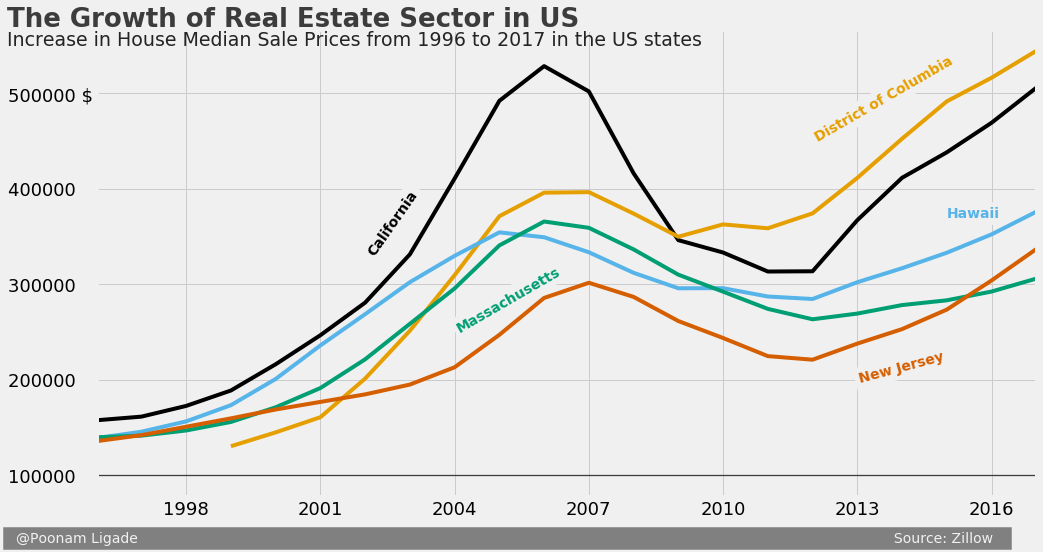

In [9]:
# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255], 
          [213/255,94/255,0], [0,114/255,178/255]]


States_year_SalePrices=State_time_series_year.groupby([State_time_series_year.year,State_time_series_year.RegionName])['ZHVI_AllHomes'].mean().dropna().reset_index(name='SoldPrice')
fte_graph=States_year_SalePrices.pivot(index='year', columns='RegionName', values='SoldPrice').plot(figsize=(15,8), color=colors, legend=False)
fte_graph.figure.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.xlabel("")
fte_graph.set_yticklabels(labels = [-10, '100000   ', '200000   ',  '300000   ', '400000   ',  '500000 $'])
# Generate a bolded horizontal line at y = 0 
fte_graph.axhline(y = 100000, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
fte_graph.set_xlim(left = 1996, right = 2017)
# The signature bar

fte_graph.text(x = 1994, y = 30000,
    s = '  @Poonam Ligade                                                                                                                                                                        Source: Zillow   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')


# Adding a title and a subtitle
fte_graph.text(x = 1994, y = 570000, s = "The Growth of Real Estate Sector in US",
               fontsize = 26, weight = 'bold', alpha = .75)
fte_graph.text(x = 1994, y = 550000, 
               s = 'Increase in House Median Sale Prices from 1996 to 2017 in the US states',
              fontsize = 19, alpha = .85)

# Add colored labels
fte_graph.text(x = 2002, y = 390000, s = 'California', color = colors[0], weight = 'bold', rotation = 55,
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2012, y = 530000, s = 'District of Columbia', color = colors[1], weight = 'bold', rotation = 30,
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2015, y = 370000, s = 'Hawaii', color = colors[2], weight = 'bold', rotation = 0, 
               backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2004, y = 310000, s = 'Massachusetts', color = colors[3], weight = 'bold', rotation = 30,
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2013, y = 220000, s = 'New Jersey', color = colors[4], weight = 'bold',  rotation = 15,
              backgroundcolor = '#f0f0f0');

That's FiveThirtyEight style graph. It pretty much self explanatory.
These are the top five States which have highest Median Sold Price.
1. DistrictOfColumbia has started from Median Selling price of less than 150 thousand dollars and crossed more than 500 thousand dollars by 2017. 
2. California started around 200 thousand dollars and has reached its highest selling price of around 470 thousand dollars in late  2006 and early 2007 and started decresing there after. 

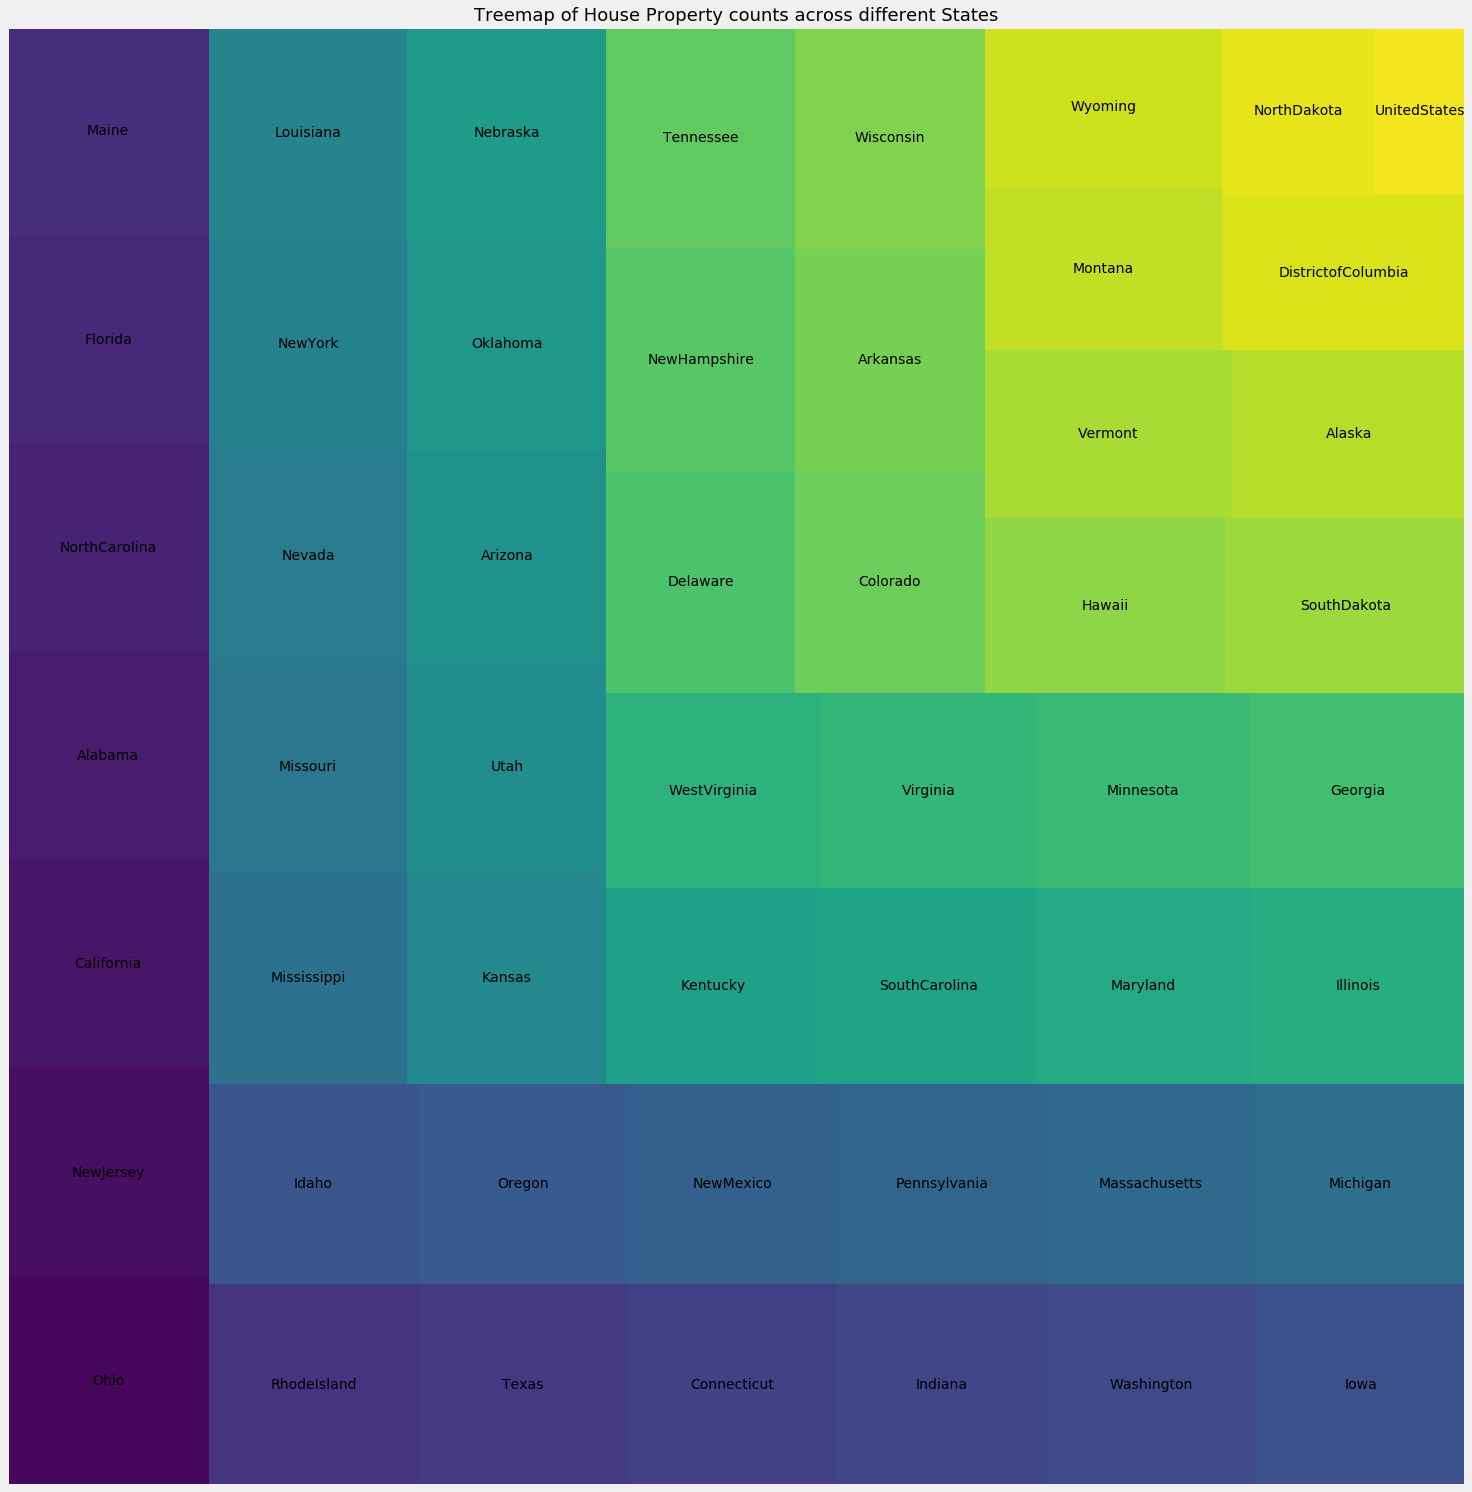

In [10]:
fig = plt.figure(figsize=(25, 21))
regions=State_time_series.RegionName.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=regions['RegionName'].values,label=regions.index,
              color=sns.color_palette('viridis', 52), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of House Property counts across different States", fontsize=18)
plt.show();

All the States recorded have got same number of listings except North Dakota as you can see in upper right yellow corner. United States seems to have added when region name was not available in case on nulls so US have got lowest listings.

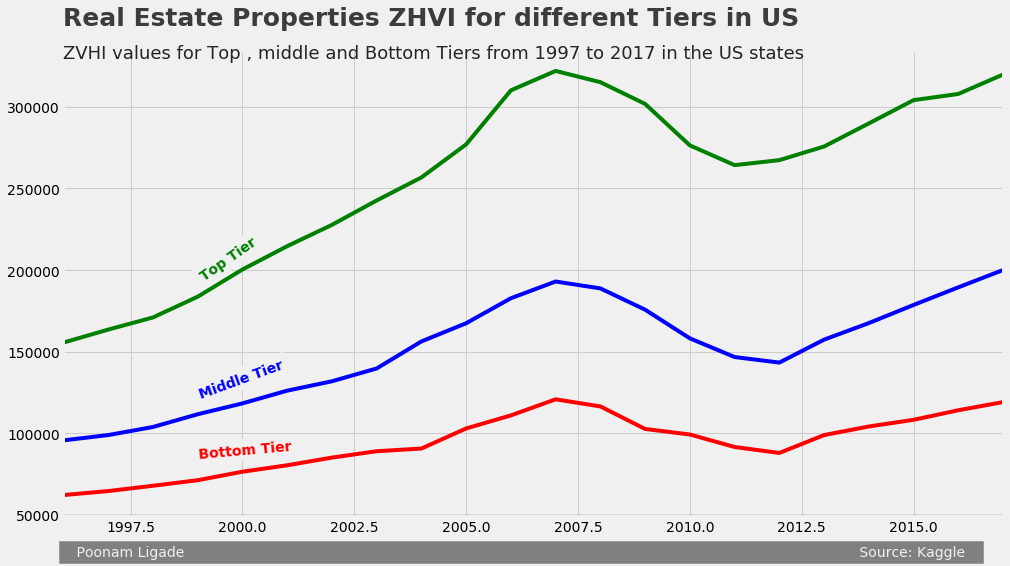

In [11]:
plt.figure(figsize=(15,8));
#plt.figure.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

State_time_series.groupby(State_time_series['year'])['ZHVI_TopTier'].median().plot(linewidth=4,c='g')
State_time_series.groupby(State_time_series['year'])['ZHVI_MiddleTier'].median().plot(linewidth=4,c='b')
State_time_series.groupby(State_time_series['year'])['ZHVI_BottomTier'].median().plot(linewidth=4,c='r')

# Generate a bolded horizontal line at y = 0 
plt.axhline(y = 50000, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
plt.xlim(left = 1996, right = 2017)
# The signature bar
plt.text(x = 1996, y = 25000,
    s = '   Poonam Ligade                                                                                                                                                      Source: Kaggle   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
plt.text(x = 1996, y = 350000, s = "Real Estate Properties ZHVI for different Tiers in US",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 1996, y = 330000, 
               s = 'ZVHI values for Top , middle and Bottom Tiers from 1997 to 2017 in the US states',
              fontsize = 18, alpha = .85);

plt.text(x = 1999, y = 215000, s = 'Top Tier', color = 'g', weight = 'bold', rotation = 35,
              backgroundcolor = '#f0f0f0')
plt.text(x = 1999, y = 140000, s = 'Middle Tier', color = 'b', weight = 'bold', rotation = 20,
              backgroundcolor = '#f0f0f0')
plt.text(x = 1999, y = 90000, s = 'Bottom Tier', color = 'r', weight = 'bold', rotation = 5,
              backgroundcolor = '#f0f0f0');


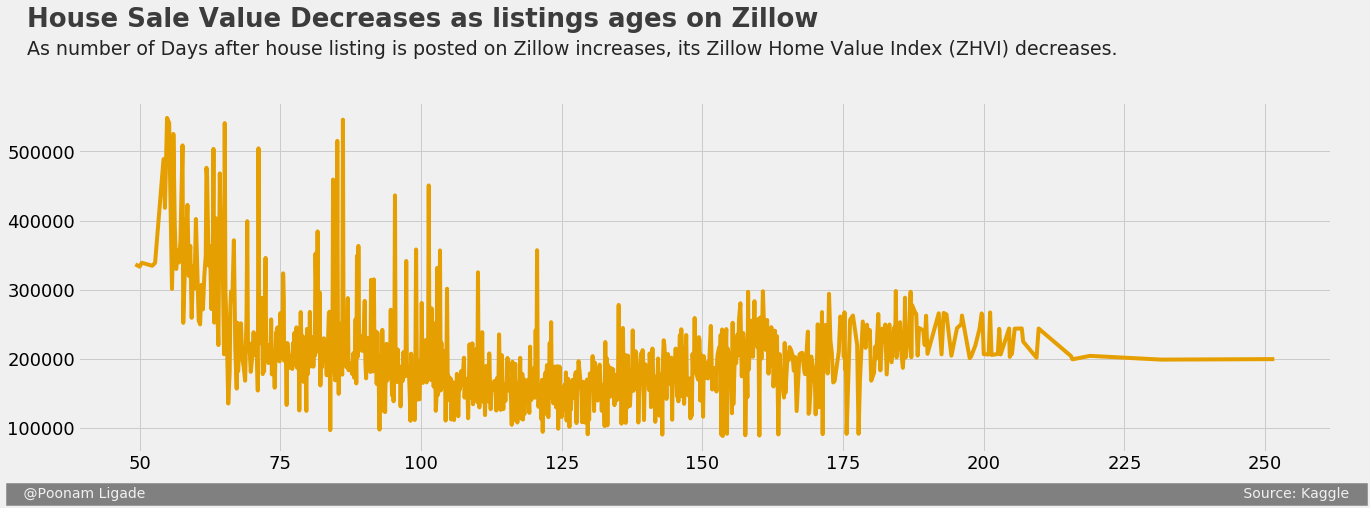

In [12]:
#ZHVI VS. Days On Zillow
plt.figure(figsize=(20, 6))
mean_group = State_time_series[['DaysOnZillow_AllHomes','ZHVI_AllHomes']].groupby(['DaysOnZillow_AllHomes'])['ZHVI_AllHomes'].mean()
plt.plot(mean_group , color=[230/255,159/255,0])
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

# The signature bar

plt.text(x = 27, y = -1500,
    s = '   @Poonam Ligade                                                                                                                                                                                                                                                    Source: Kaggle   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')


# Adding a title and a subtitle
plt.text(x = 30, y = 680000, s = "House Sale Value Decreases as listings ages on Zillow",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = 30, y = 640000, 
               s = 'As number of Days after house listing is posted on Zillow increases, its Zillow Home Value Index (ZHVI) decreases.',
              fontsize = 19, alpha = .85);


**Zillow Home Value Index (ZHVI): **A smoothed seasonally adjusted measure of the median estimated home value across a given region and housing type. A dollar denominated alternative to repeat-sales indices. Find a more detailed methodology here: http://www.zillow.com/research/zhvi-methodology-6032/

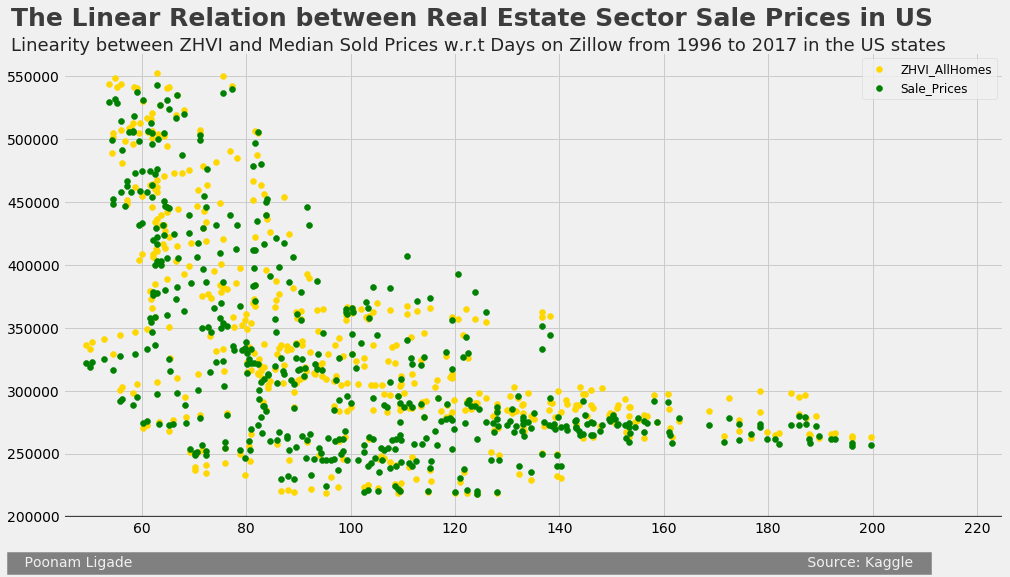

In [13]:
plt.figure(figsize=(15,8));

plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.ZHVI_AllHomes,c="gold");
plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.Sale_Prices,c="green");

# Generate a bolded horizontal line at y = 0 
plt.axhline(y = 200000, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
plt.xlim(left = 45, right = 225)
# The signature bar

plt.text(x = 35, y = 160000,
    s = '   Poonam Ligade                                                                                                                                                      Source: Kaggle   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.legend(fontsize=12,loc='best',frameon=1,fancybox=1)
# Adding a title and a subtitle
plt.text(x = 35, y = 590000, s = "The Linear Relation between Real Estate Sector Sale Prices in US",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 35, y = 570000, 
               s = 'Linearity between ZHVI and Median Sold Prices w.r.t Days on Zillow from 1996 to 2017 in the US states',
              fontsize = 18, alpha = .85);

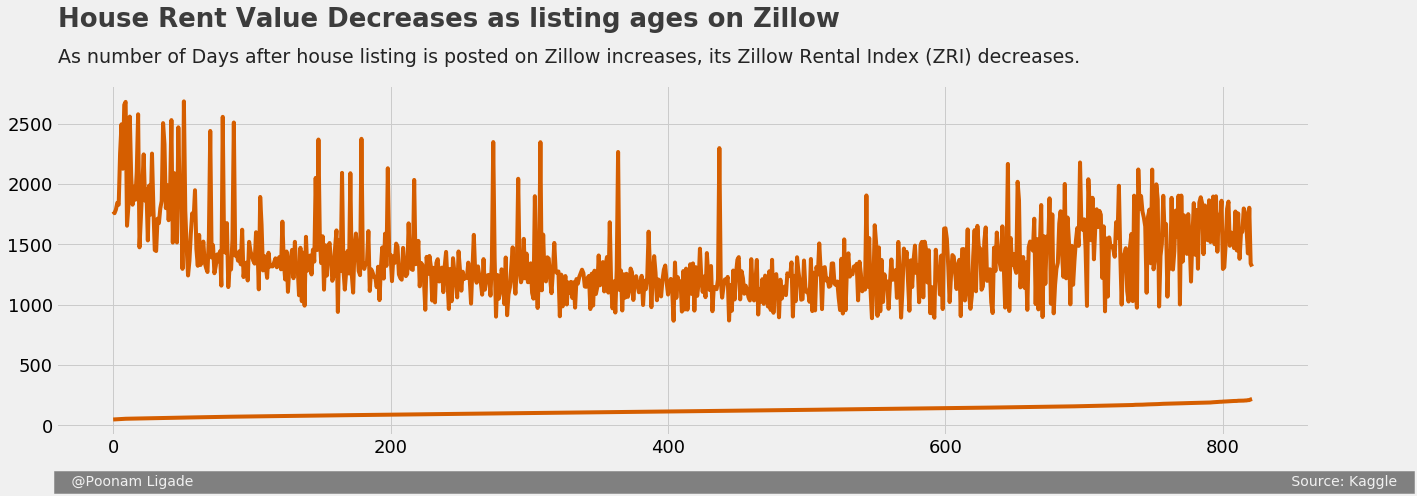

In [14]:
#ZRI VS. Days On Zillow

plt.figure(figsize=(20, 6))
mean_group = State_time_series[['DaysOnZillow_AllHomes','ZRI_AllHomes']].groupby(['DaysOnZillow_AllHomes'])['ZRI_AllHomes'].mean().dropna().reset_index(name='ZRI_AllHomes_Mean')
mean_group=mean_group[(mean_group.DaysOnZillow_AllHomes < 250)]
mean_group=mean_group[(mean_group.ZRI_AllHomes_Mean > 500)]

plt.plot(mean_group , color=[213/255,94/255,0])

plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

# The signature bar

plt.text(x = -40, y = -500,
    s = '   @Poonam Ligade                                                                                                                                                                                                                                                    Source: Kaggle   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')


# Adding a title and a subtitle
plt.text(x = -40, y = 3300, s = "House Rent Value Decreases as listing ages on Zillow",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = -40, y = 3000, 
               s = 'As number of Days after house listing is posted on Zillow increases, its Zillow Rental Index (ZRI) decreases.',
              fontsize = 19, alpha = .85);
plt.show();

**Zillow Rent Index (ZRI)**: A smoothed seasonally adjusted measure of the median estimated market rate rent across a given region and housing type. A dollar denominated alternative to repeat-rent indices. Find a more detailed methodology here: http://www.zillow.com/research/zillow-rent-index-methodology-2393/

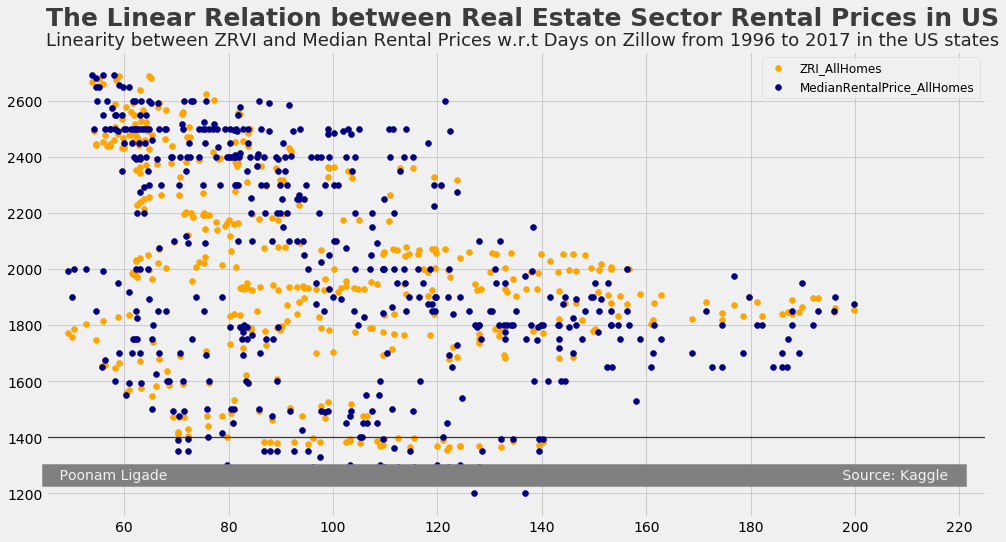

In [15]:
plt.figure(figsize=(15,8));

plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.ZRI_AllHomes,c="orange")
plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.MedianRentalPrice_AllHomes,c="navy");


# Generate a bolded horizontal line at y = 0 
plt.axhline(y = 1400, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
plt.xlim(left = 45, right = 225)
# The signature bar

plt.text(x = 45, y = 1250,
    s = '   Poonam Ligade                                                                                                                                                      Source: Kaggle   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.legend(fontsize=12,loc='best',frameon=1,fancybox=1)
# Adding a title and a subtitle
plt.text(x = 45, y = 2870, s = "The Linear Relation between Real Estate Sector Rental Prices in US",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 45, y = 2800, 
               s = 'Linearity between ZRVI and Median Rental Prices w.r.t Days on Zillow from 1996 to 2017 in the US states',
              fontsize = 18, alpha = .85);

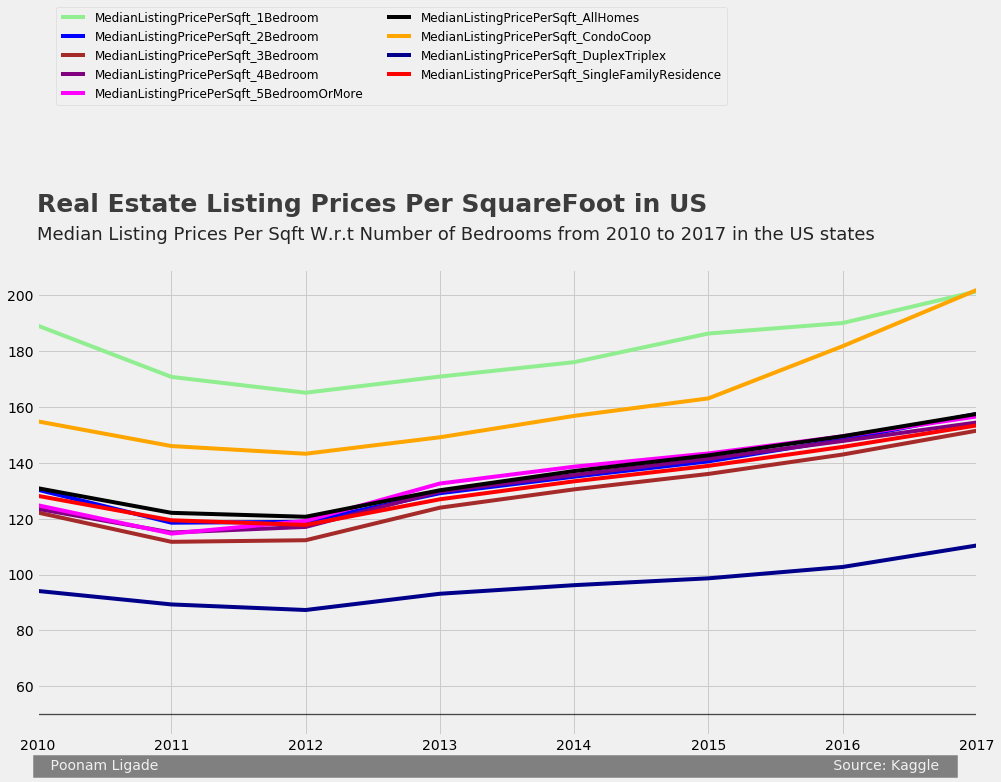

In [16]:
plt.figure(figsize=(15,8));
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_1Bedroom'].mean().dropna().plot(linewidth=4,c='lightgreen', legend=False)
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_2Bedroom'].mean().dropna().plot(linewidth=4,c='b')
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_3Bedroom'].mean().dropna().plot(linewidth=4,c='brown')
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_4Bedroom'].mean().dropna().plot(linewidth=4,c='purple')
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_5BedroomOrMore'].mean().dropna().plot(linewidth=4,c='magenta')
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_AllHomes'].mean().dropna().plot(linewidth=4,c='black')
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_CondoCoop'].mean().dropna().plot(linewidth=4,c='orange',legend=False)
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_DuplexTriplex'].mean().dropna().plot(linewidth=4,c='darkblue',legend=False)
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_SingleFamilyResidence'].mean().dropna().plot(linewidth=4,c='red')
plt.legend(fontsize=12,loc=(2009,200),frameon=1,fancybox=1,bbox_to_anchor=(0.02,1.35), ncol=2)


# Generate a bolded horizontal line at y = 0 
plt.axhline(y = 50, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
plt.xlim(left = 2010, right = 2017)
# The signature bar

plt.text(x = 2010, y = 30,
    s = '   Poonam Ligade                                                                                                                                                      Source: Kaggle   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
plt.text(x = 2010, y = 230, s = "Real Estate Listing Prices Per SquareFoot in US",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 2010, y = 220, 
               s = 'Median Listing Prices Per Sqft W.r.t Number of Bedrooms from 2010 to 2017 in the US states',
              fontsize = 18, alpha = .85);

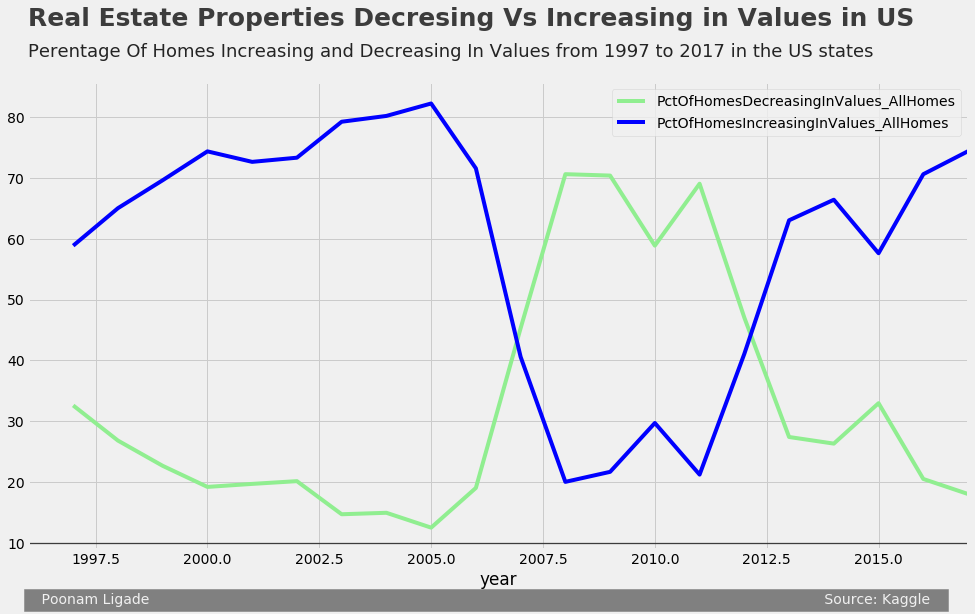

In [17]:
plt.figure(figsize=(15,8));

State_time_series.groupby(State_time_series['year'])['PctOfHomesDecreasingInValues_AllHomes'].median().plot(linewidth=4,c='lightgreen', legend=False)
State_time_series.groupby(State_time_series['year'])['PctOfHomesIncreasingInValues_AllHomes'].median().plot(linewidth=4,c='b')

# Generate a bolded horizontal line at y = 0 
plt.axhline(y = 10, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
plt.xlim(left = 1996, right = 2017)
# The signature bar
plt.legend()
plt.text(x = 1996, y = 0,
    s = '   Poonam Ligade                                                                                                                                                      Source: Kaggle   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
plt.text(x = 1996, y = 95, s = "Real Estate Properties Decresing Vs Increasing in Values in US",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 1996, y = 90, 
               s = 'Perentage Of Homes Increasing and Decreasing In Values from 1997 to 2017 in the US states',
              fontsize = 18, alpha = .85);

Both Lines look so complementory as expected , the deep low and peak around 2008 is due to financial crisis.

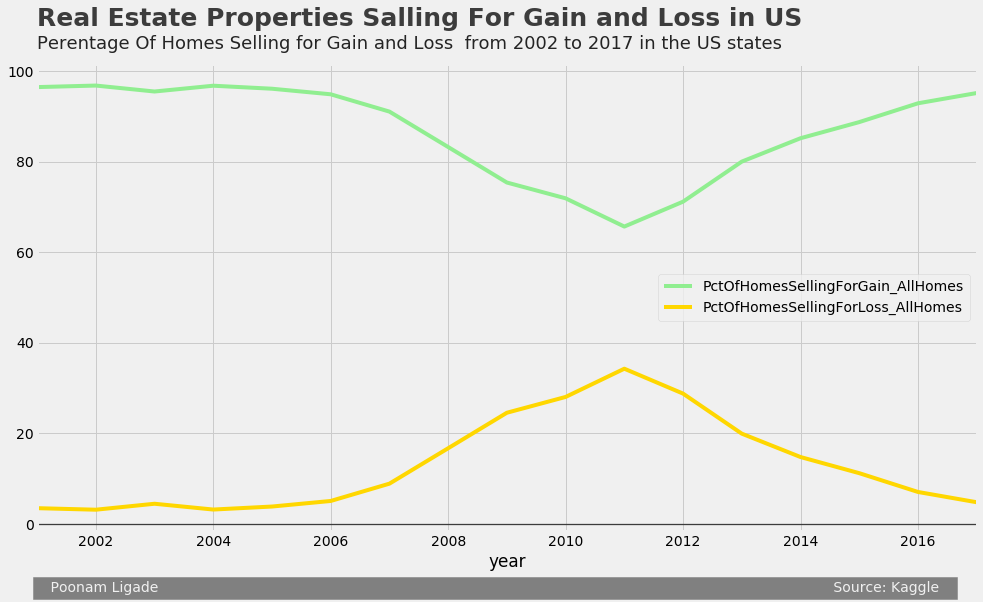

In [18]:
plt.figure(figsize=(15,8));

State_time_series.groupby(State_time_series['year'])['PctOfHomesSellingForGain_AllHomes'].median().plot(linewidth=4,c='lightgreen', legend=False)
State_time_series.groupby(State_time_series['year'])['PctOfHomesSellingForLoss_AllHomes'].median().plot(linewidth=4,c='gold')
plt.legend()

# Generate a bolded horizontal line at y = 0 
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
plt.xlim(left = 2001, right = 2017)
# The signature bar

plt.text(x = 2001, y = -15,
    s = '   Poonam Ligade                                                                                                                                                      Source: Kaggle   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
plt.text(x = 2001, y = 110, s = "Real Estate Properties Salling For Gain and Loss in US",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 2001, y = 105, 
               s = 'Perentage Of Homes Selling for Gain and Loss  from 2002 to 2017 in the US states',
              fontsize = 18, alpha = .85);


This looks beautiful too. Both Lines look so complementory as expected , After 2008 Properties started Selling for loss due to recession and that time only properties selling for gain has decresed .

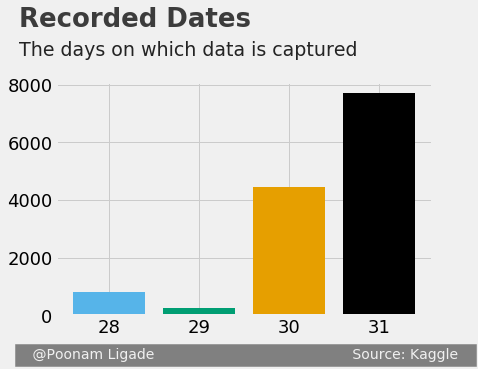

In [19]:
plt.figure().gca().xaxis.set_major_locator(MaxNLocator(integer=True))
State_time_series.day=State_time_series.Date.dt.day
plt.bar(State_time_series.day.value_counts().index,State_time_series.day.value_counts().values,color=colors);
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
# The signature bar

plt.text(x = 27, y = -1500,
    s = '   @Poonam Ligade                                            Source: Kaggle   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')


# Adding a title and a subtitle
plt.text(x = 27, y = 10000, s = "Recorded Dates ",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = 27, y = 9000, 
               s = 'The days on which data is captured',
              fontsize = 19, alpha = .85);


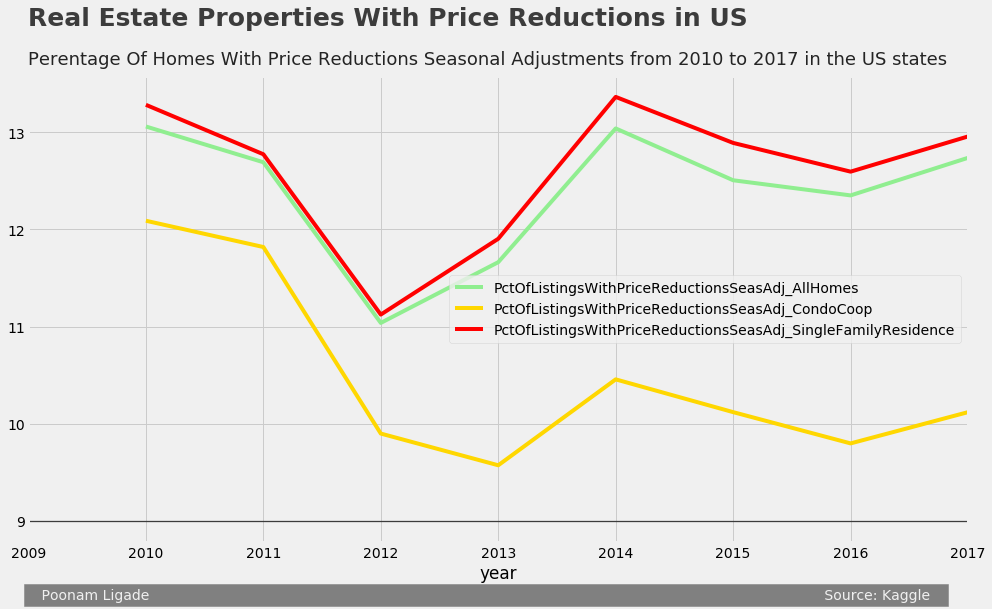

In [20]:
plt.figure(figsize=(15,8));

State_time_series.groupby(State_time_series['year'])['PctOfListingsWithPriceReductionsSeasAdj_AllHomes'].median().plot(linewidth=4,c='lightgreen', legend=False)
State_time_series.groupby(State_time_series['year'])['PctOfListingsWithPriceReductionsSeasAdj_CondoCoop'].median().plot(linewidth=4,c='gold')
State_time_series.groupby(State_time_series['year'])['PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence'].median().plot(linewidth=4,c='red')

plt.legend(loc='center right')

# Generate a bolded horizontal line at y = 0 
plt.axhline(y = 9, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
plt.xlim(left = 2009, right = 2017)
# The signature bar

plt.text(x = 2009, y = 8.2,
    s = '   Poonam Ligade                                                                                                                                                      Source: Kaggle   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
plt.text(x = 2009, y = 14.1, s = "Real Estate Properties With Price Reductions in US",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 2009, y = 13.7, 
               s = 'Perentage Of Homes With Price Reductions Seasonal Adjustments from 2010 to 2017 in the US states',
              fontsize = 18, alpha = .85);

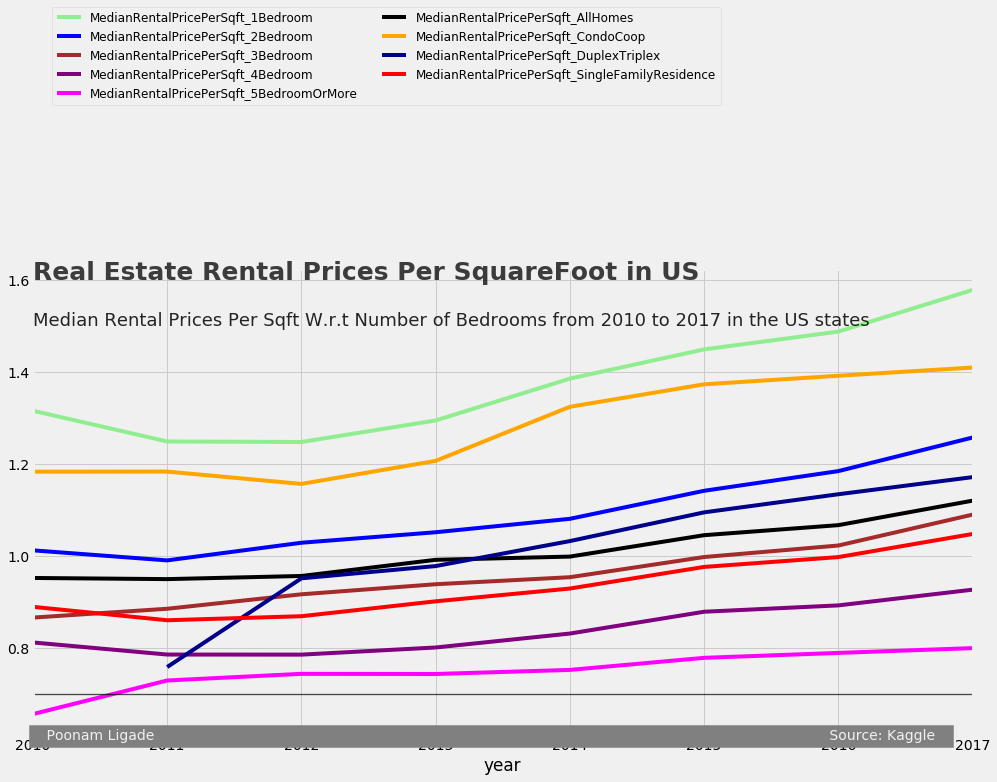

In [21]:
plt.figure(figsize=(15,8));
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_1Bedroom'].mean().dropna().plot(linewidth=4,c='lightgreen', legend=False)
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_2Bedroom'].mean().dropna().plot(linewidth=4,c='b')
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_3Bedroom'].mean().dropna().plot(linewidth=4,c='brown')
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_4Bedroom'].mean().dropna().plot(linewidth=4,c='purple')
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_5BedroomOrMore'].mean().dropna().plot(linewidth=4,c='magenta')
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_AllHomes'].mean().dropna().plot(linewidth=4,c='black')
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_CondoCoop'].mean().dropna().plot(linewidth=4,c='orange',legend=False)
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_DuplexTriplex'].mean().dropna().plot(linewidth=4,c='darkblue',legend=False)
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_SingleFamilyResidence'].mean().dropna().plot(linewidth=4,c='red')
plt.legend(fontsize=12,loc=(2010,1.65),bbox_to_anchor=(0.02,1.35), ncol=2)

# Generate a bolded horizontal line at y = 0 
plt.axhline(y = 0.7, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
plt.xlim(left = 2010, right = 2017)
# The signature bar

plt.text(x = 2010, y = 0.6,
    s = '   Poonam Ligade                                                                                                                                                      Source: Kaggle   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
plt.text(x = 2010, y = 1.6, s = "Real Estate Rental Prices Per SquareFoot in US",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 2010, y = 1.5, 
               s = 'Median Rental Prices Per Sqft W.r.t Number of Bedrooms from 2010 to 2017 in the US states',
              fontsize = 18, alpha = .85);

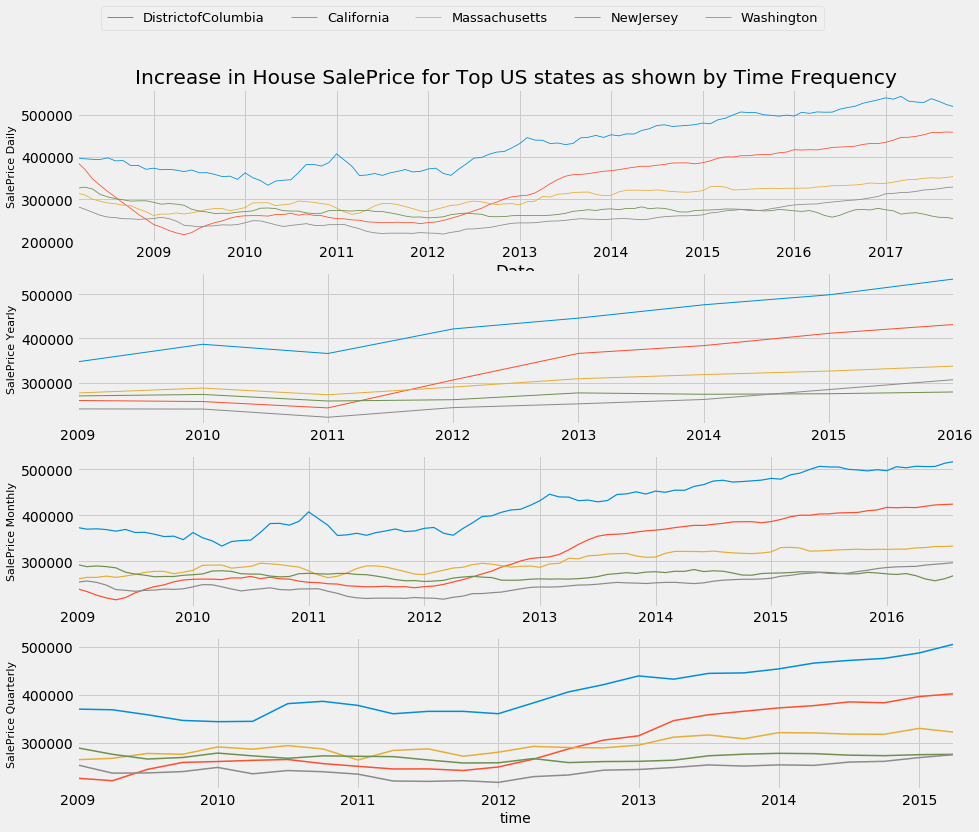

In [22]:
States_year_SalePrices=State_time_series_year.groupby([State_time_series_year.Date,State_time_series_year.RegionName])['Sale_Prices'].mean().dropna().reset_index(name='Sale_Prices')
PriceDF=States_year_SalePrices.pivot(index='Date', columns='RegionName', values='Sale_Prices').dropna()#.plot(figsize=(15,8))#, color=colors, legend=False)

t0 = PriceDF.index
t1 = pd.date_range(pd.to_datetime('30/01/2009'),pd.to_datetime('2017-08-31'),freq='A')
t2 = pd.date_range(pd.to_datetime('30/01/2009',dayfirst=True),pd.to_datetime('2016-08-31' ,dayfirst=True),freq='M')
t3 = pd.date_range(pd.to_datetime('30/01/2009',dayfirst=True),pd.to_datetime('2015-08-31',dayfirst=True),freq='Q')



fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(14,12))
ax[0].set_title("Increase in House SalePrice for Top US states as shown by Time Frequency")
PriceDF.reindex(index=t0,columns=highest_cost_states).plot(ax=ax[0], lw=0.8, legend=False);
#ax[0].set_xlabel('Year')
ax[0].set_ylabel('SalePrice Daily', fontsize=11)
PriceDF.reindex(index=t1,columns=highest_cost_states).plot(ax=ax[1], lw=1.0, legend=False);
ax[1].set_ylabel('SalePrice Yearly', fontsize=11)

PriceDF.reindex(index=t2,columns=highest_cost_states).plot(ax=ax[2], lw=1.2, legend=False); 
ax[2].set_ylabel('SalePrice Monthly', fontsize=11)

PriceDF.reindex(index=t3,columns=highest_cost_states).plot(ax=ax[3], lw=1.5, legend=False);
ax[3].set_ylabel('SalePrice Quarterly', fontsize=11)


ax[0].legend(loc='lower left',fontsize=13, bbox_to_anchor=(0.02,1.35), ncol=len(highest_cost_states));
ax[3].set_xlabel('time', fontsize=14);


We can see that there is incresing/upward trend in sale price throughout the years, months , quarters and days. 
We can not find much periodicity in this plot . For checking that we have to break down data further. 

## Prediction of 2017 House Prices with Facebook Prophet library

In [23]:
StateDF=State_time_series_year[['Date','ZHVI_AllHomes']]
StateDF.dropna(inplace=True)
#prophet expects data in the format as DF('ds','y)
StateDF['ds']=StateDF['Date']
StateDF['y']=np.log(StateDF['ZHVI_AllHomes'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [24]:
del StateDF['Date']
del StateDF['ZHVI_AllHomes']
StateDF.head()

,ds,y
3,1996-04-30,11.969717
19,1996-04-30,11.829924
27,1996-04-30,11.851538
41,1996-04-30,11.808576
47,1996-05-31,11.969084


In [25]:
train=StateDF[:len(StateDF)-40]
train.shape

(1227, 2)

In [26]:
test=StateDF[len(StateDF)-40:]
test.shape

(40, 2)

In [27]:
m = Prophet()
m.fit(StateDF);

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future = m.make_future_dataframe(periods=40) # days for test split
future.tail()

,ds
1302,2018-02-05
1303,2018-02-06
1304,2018-02-07
1305,2018-02-08
1306,2018-02-09


In [29]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1302,2018-02-05,12.973543,12.754404,13.192545
1303,2018-02-06,12.978622,12.757299,13.194113
1304,2018-02-07,12.983092,12.750161,13.202182
1305,2018-02-08,12.986875,12.777608,13.206431
1306,2018-02-09,12.989909,12.770075,13.205429


## Visualize Forecasted data

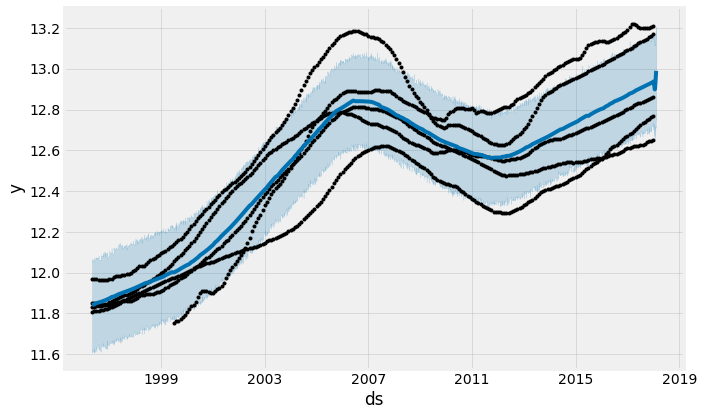

In [30]:
m.plot(forecast);

## Visualize Components of Forecasted data

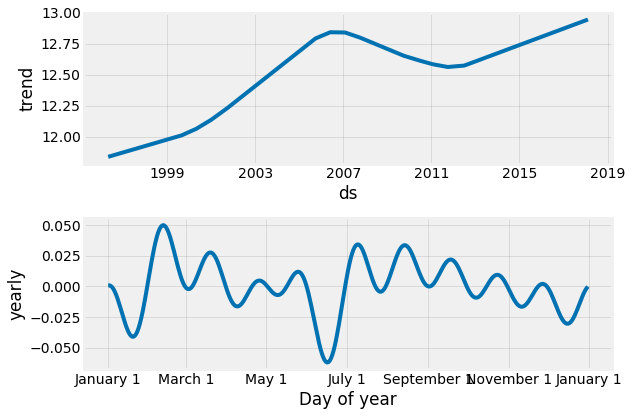

In [31]:
m.plot_components(forecast);


In [32]:
y_truth = test.y.values
y_forecasted = forecast.iloc[-40:,2].values


denominator = (np.abs(y_truth) + np.abs(y_forecasted))
diff = np.abs(y_truth - y_forecasted) / denominator
diff[denominator == 0] = 0.0
